Compute performance metrics for the given Y and Y_score without `sklearn`.

In [1]:
import numpy as np
import pandas as pd

In [8]:
class PerformanceMetricsABC(object):
    """
    This class is a solution for problem A, B and C.
    """
    
    def __init__(self, datafile, T):
        self.datafile = datafile
        self.T = T
        self.df = pd.read_csv(filepath_or_buffer=datafile)
        self.df_dup = self.df.copy()
        self.df_dup['y_p'] = np.where(self.df_dup['proba'] < self.T, 0.0, 1.0)
    
    def compute_cm_values(self, data, c1, c2) -> tuple:
        """
        This method computes confusion matrix values.
        """
        TN = len(data[(data[c1] == 0.0) & (data[c2] == 0.0)])
        FP = len(data[(data[c1] == 0.0) & (data[c2] == 1.0)])
        FN = len(data[(data[c1] == 1.0) & (data[c2] == 0.0)])
        TP = len(data[(data[c1] == 1.0) & (data[c2] == 1.0)])
        return TN, FP, FN, TP
    
    def compute_cm_rates(self) -> tuple:
        """
        This method computes confusion matrix rates.
        """
        TN, FP, FN, TP = self.compute_cm_values(
            data=self.df_dup, c1='y', c2='y_p')
        N = TN + FP; P = FN + TP;
        TNR = TN / N; FPR = FP / N; FNR = FN / P; TPR = TP / P;
        return TNR, FPR, FNR, TPR
    
    def compute_recall(self) -> float:
        """
        This method computes recall.
        """
        TN, FP, FN, TP = self.compute_cm_values(
            data=self.df_dup, c1='y', c2='y_p')
        N = TN + FP; P = FN + TP;
        return TP / P
    
    def compute_precision(self) -> float:
        """
        This method computes precision.
        """
        TN, FP, FN, TP = self.compute_cm_values(
            data=self.df_dup, c1='y', c2='y_p')
        return TP / (TP + FP)
    
    def compute_f1_score(self) -> float:
        """
        This method computes F1 score.
        """
        r = self.compute_recall()
        p = self.compute_precision()
        return 2 * ((r * p) / (r + p))
    
    def compute_accuracy(self) -> float:
        """
        This method computes accuracy.
        """
        TN, FP, FN, TP = self.compute_cm_values(
            data=self.df_dup, c1='y', c2='y_p')
        return (TN + TP) / (TN + FP + FN + TP)
    
    def compute_auc(self) -> tuple:
        """
        This method computes Area Under ROC Curve score.
        """
        FPR_arr = list()
        TPR_arr = list()
        A = list()
        
        sorted_df_dup = self.df_dup.sort_values(by='proba')
        
        for tau in sorted_df_dup['proba'].tolist():
            y_actual = np.array(sorted_df_dup['y'].to_list())
            y_pred = np.where((sorted_df_dup['proba'] < tau), 0, 1)
            
            tau_df = pd.DataFrame()
            tau_df['y'] = y_actual
            tau_df['y_p'] = y_pred
            
            TN, FP, FN, TP = self.compute_cm_values(
                data=tau_df, c1='y', c2='y_p')
            N = TN + FP; P = FN + TP;
            FPR = FP / N; TPR = TP / P;
            
            FPR_arr.append(FPR)
            TPR_arr.append(TPR)
            A.append((500 * FN) + (100 * FP))
            
        FPR_arr = np.array(FPR_arr)
        TPR_arr = np.array(TPR_arr)
        A = np.array(A)
        
        optimum_t = np.min(a=A)
        auc = np.abs(np.trapz(y=TPR_arr, x=FPR_arr))
        return FPR_arr, TPR_arr, optimum_t, round(auc, 5)
    
    def report(self) -> None:
        """
        This method prints the performance metrics.
        """
        from matplotlib import pyplot as plt
        from matplotlib import style
        style.use(style='seaborn-whitegrid')
        
        TN, FP, FN, TP = self.compute_cm_values(
            data=self.df_dup, c1='y', c2='y_p')
        conf_mat = np.matrix(data=[[TN, FP], [FN, TP]])
        f1_score = round(self.compute_f1_score(), 5)
        FPR_arr, TPR_arr, optimum_t, auc = self.compute_auc()
        acc_score = round(self.compute_accuracy(), 5)
        
        print("Confusion Matrix:\n{}\n".format(conf_mat))
        
        print("F1 Score: {}\n".format(f1_score))
        
        plt.figure(figsize=(10, 6))
        plt.plot(FPR_arr, TPR_arr)
        title = 'Receiver Operating Characteristic Curve (AUC = {})'.format(auc)
        plt.title(label=title)
        plt.xlabel(xlabel='FPRs')
        plt.ylabel(ylabel='TPRs')
        plt.show()
        
        print("\nOptimum Threshold: {}\n".format(optimum_t))
        
        print("Accuracy: {}".format(acc_score))
        return None

---

A. Compute performance metrics for the given data '5_a.csv'

Confusion Matrix:
[[    0   100]
 [    0 10000]]

F1 Score: 0.99502



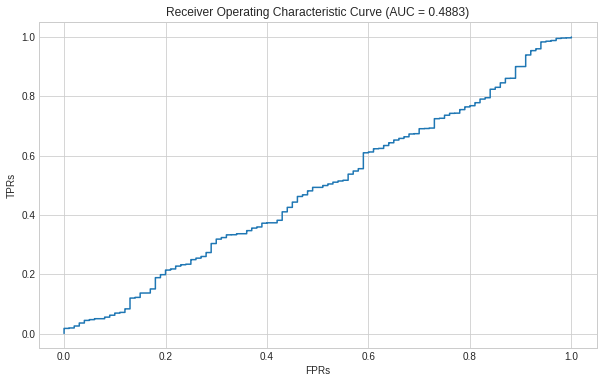


Optimum Threshold: 10000

Accuracy: 0.9901


In [3]:
prob_A = PerformanceMetricsABC(datafile='5_a.csv', T=0.5)
prob_A.report()

---

B. Compute performance metrics for the given data '5_b.csv'

Confusion Matrix:
[[9761  239]
 [  45   55]]

F1 Score: 0.27919



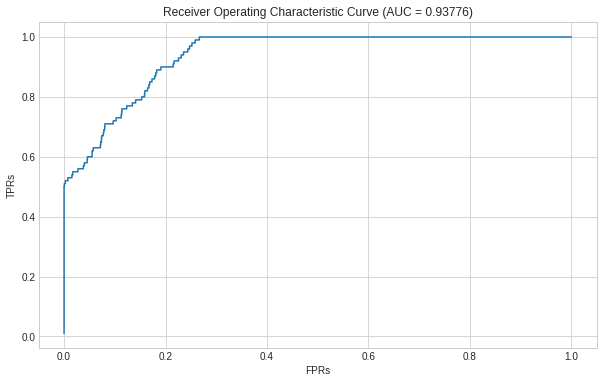


Optimum Threshold: 25000

Accuracy: 0.97188


In [4]:
prob_B = PerformanceMetricsABC(datafile='5_b.csv', T=0.5)
prob_B.report()

---

C. Compute the best threshold for the given data '5_c.csv'

Confusion Matrix:
[[1637  168]
 [ 462  585]]

F1 Score: 0.65



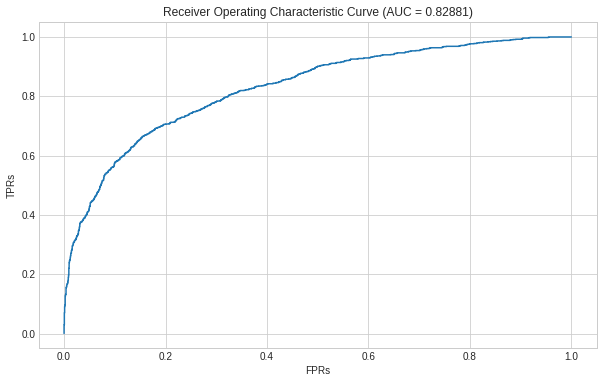


Optimum Threshold: 141000

Accuracy: 0.7791


In [5]:
prob_C = PerformanceMetricsABC(datafile='5_c.csv', T=0.5)
prob_C.report()

---

In [6]:
class PerformanceMetricsD(object):
    """
    This class is a solution for problem D.
    """
    
    def __init__(self, datafile):
        self.datafile = datafile
        self.df = pd.read_csv(filepath_or_buffer=self.datafile)
        self.ai = self.df['y'].to_numpy()
        self.pi = self.df['pred'].to_numpy()
        self.ei = np.abs(self.ai - self.pi)
        self.ai_m = np.mean(a=self.ai)
        self.n = len(self.df)
    
    def compute_mse(self) -> float:
        """
        This method computes MSE.
        """
        return (1 / self.n) * (self.compute_ssr())
    
    def compute_mape(self) -> float:
        """
        This method computes MAPE.
        """
        return np.sum(self.ei) / np.sum(self.ai)
    
    def compute_sst(self) -> float:
        """
        This method computes SST.
        """
        return np.sum((self.ai - self.ai_m) ** 2)
    
    def compute_ssr(self) -> float:
        """
        This method computes SSR.
        """
        return np.sum(self.ei ** 2)
    
    def compute_R2(self) -> float:
        """
        This method computes R^2.
        """
        return (1 - (self.compute_ssr() / self.compute_sst()))
    
    def report(self) -> None:
        """
        This method prints the performance metrics.
        """
        mse = round(self.compute_mse(), 5)
        mape = round(self.compute_mape(), 5)
        r2 = round(self.compute_R2(), 5)
        
        print("MSE: {}\n".format(mse))
        print("MAPE: {}\n".format(mape))
        print("R^2: {}".format(r2))

---

D. Compute performance metrics (for regression) for the given data '5_d.csv'

In [7]:
prob_D = PerformanceMetricsD(datafile='5_d.csv')
prob_D.report()

MSE: 177.1657

MAPE: 0.12912

R^2: 0.95636


---

End of the file.